# Project: Wrangle and Analyze Data

In [305]:
import pandas as pd
import numpy as np
import requests
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns   
%matplotlib inline
plt.rcParams['figure.figsize']=(9,10)

## Gathering Data

This project contains three datasets:
Twitter archive (csv file) Image predictions for dogs(tsv file), download it programmatically as a URL by request library. Twitter info which is on twitter servers encompassed in Twitter archive , we will download it by Tweepy library.

In [306]:
# Loading the data and having a look at the top few rows
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [307]:
# tsv file by using request library to download 

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open(url.split('/')[-1], mode="wb") as file:
    file.write(response.content)

# Load the image predictions data into a DataFrame
image_predictions = pd.read_csv('image-predictions.tsv', sep = '\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [308]:
#import tweepy
#from tweepy import OAuthHandler
#from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
#consumer_key = 'HIDDEN'
#consumer_secret = 'HIDDEN'
#access_token = 'HIDDEN'
#access_secret = 'HIDDEN'

#auth = OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth, wait_on_rate_limit=True)

#tweet_ids = df_1.tweet_id.values
#len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
#count = 0
#fails_dict = {}
#start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
#with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
   # for tweet_id in tweet_ids:
    #    count += 1
     #   print(str(count) + ": " + str(tweet_id))
      #  try:
       #     tweet = api.get_status(tweet_id, tweet_mode='extended')
        #    print("Success")
         #   json.dump(tweet._json, outfile)
          #  outfile.write('\n')
        #except tweepy.TweepError as e:
         #   print("Fail")
          #  fails_dict[tweet_id] = e
           # pass
#end = timer()
#print(end - start)
#print(fails_dict)

In [309]:
# Create a dataframe with tweet ID, retweet count, and favorite count
with open('tweet-json.txt') as json_f:
    json_tweet = pd.DataFrame(columns = ['tweet_id','favorites','retweets'])
    
    for info in json_f:
        tweets = json.loads(info)
        data = {'tweet_id': tweets['id'],'favorites': tweets['favorite_count'],
                                      'retweets': tweets['retweet_count']}
        ser = pd.Series(data)
        json_tweet = json_tweet.append(data,ignore_index=True)
json_tweet.head()


,tweet_id,favorites,retweets
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


## Assessing Data

Assess them visually and programmatically for quality and tidiness issues. Detect and document at least eight (8) quality issues and two (2) tidiness issues

In [310]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [311]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [312]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [313]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [314]:
json_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id     2354 non-null object
favorites    2354 non-null object
retweets     2354 non-null object
dtypes: object(3)
memory usage: 55.3+ KB


In [315]:
json_tweet

,tweet_id,favorites,retweets
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
...,...,...,...
2349,666049248165822465,111,41
2350,666044226329800704,311,147
2351,666033412701032449,128,47
2352,666029285002620928,132,48


### Quality issues 

#### For twitter_archive
1. Erroneous datatypes: shall be DateTime rather than timestamp
2. Incorrect dog names there are names like 'a', 'an', 'the', 'none'
3. Capitalize the first letter of the name
4. The favorites and retweets columns should be converted to int datatype
5. Since the tweet_id will not be used in the calculation, it should be a string instead of an integer
6. For the rating_numerator and rating_denominator should be converted to float rather than int

#### For image_predictions
7. Change the source to be more readable

#### For json_tweet
8. Since the tweet_id will not be used in the calculation, it should be a string instead of an integer

### Tidiness issues

1. The doge types (doggo, floofer, pupper, and puppo) are in separated columns we have to merge it in one column called dog_types
2. Matching the data in twitter_archive dataset and tweet-JSON because the data is sorted in separated tables

## Cleaning Data

In [316]:
# Create the copies of the dataframes which will be cleaned
twitter_archive_clean=twitter_archive.copy()
image_predictions_clean= image_predictions.copy()
json_tweet_clean= json_tweet.copy()

#### Define


Merge the json_tweet_clean and image_predictions_clean tables to the twitter_archive_clean table, both joining on tweet_id.

#### Code

In [317]:
# Define 1
# First, merge json_tweet_clean table to the witter_archive_clean
twitter_archive_clean = pd.merge(twitter_archive_clean, json_tweet_clean, on = 'tweet_id', how = 'inner')

# Second, merge image_predictions_clean table to the twitter_archive_clean
twitter_archive_clean = pd.merge(twitter_archive_clean, image_predictions_clean, on = 'tweet_id', how = 'inner')

twitter_archive_clean.tweet_id = twitter_archive_clean.tweet_id.astype(str)
image_predictions_clean.tweet_id = image_predictions_clean.tweet_id.astype(str)
twitter_archive_clean[twitter_archive_clean.duplicated(['tweet_id'], keep=False)]

# Test
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


#### Define
Convert timestamp to datetime

#### Code

In [318]:
# Convert timestamp to datetime
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

# New columns ceated
twitter_archive_clean['year'] = twitter_archive_clean['timestamp'].dt.year
twitter_archive_clean['month'] = twitter_archive_clean['timestamp'].dt.month
twitter_archive_clean['day'] = twitter_archive_clean['timestamp'].dt.day

#drop timestamp column
twitter_archive_clean = twitter_archive_clean.drop('timestamp', 1)

#### Test

In [319]:
# test
list(twitter_archive_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'favorites',
 'retweets',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'year',
 'month',
 'day']

#### Define
Show the inccorected names of dog then put it as "None" rows

#### Code

In [320]:
# Code
twitter_archive_clean.name.sort_values()

#check for the names to find the incorrected ones
twitter_archive_clean['name'].value_counts().head(50)

None        577
a            55
Charlie      11
Cooper       10
Penny        10
Oliver       10
Lucy         10
Tucker       10
Sadie         8
Winston       8
Lola          8
Bo            8
the           7
Toby          7
an            7
Daisy         7
Rusty         6
Stanley       6
Bella         6
Bailey        6
Koda          6
Dave          6
Milo          6
Jax           6
Scout         6
Oscar         5
Louis         5
Buddy         5
Chester       5
Alfie         5
Leo           5
Larry         5
Jack          4
Sunny         4
one           4
Winnie        4
Reggie        4
Bentley       4
Jerry         4
Dexter        4
Phil          4
Gus           4
Clarence      4
Finn          4
Derek         4
Oakley        4
very          4
Chip          4
Brody         4
Clark         4
Name: name, dtype: int64

#### Test

In [321]:
# Test
inco_names_list = ['a','the', 'very','an']
for i in inco_names_list:
          twitter_archive_clean['name'].replace(i, 'None', inplace=True)
        
twitter_archive_clean['name'].value_counts()

None       650
Charlie     11
Penny       10
Lucy        10
Cooper      10
          ... 
Smiley       1
BeBe         1
light        1
Howie        1
Fred         1
Name: name, Length: 932, dtype: int64

#### Define
Capitalize the first letter in the name

#### Code

In [322]:
# Capitalize the first letter in the name
twitter_archive_clean['name'].str.islower().sum()

27

#### Test

In [323]:
# Test
twitter_archive_clean['name'] = twitter_archive_clean.name.str.capitalize()

twitter_archive_clean['name'].str.islower().sum()

0

#### Define
Change the columns name for to make it readable 'p1', 'p2', 'p3' , 'p1_conf', 'p2_conf' and 'p3_conf'

#### Code

In [324]:
# change the column names
image_predictions.rename(columns={'p1':'first_prediction', 'p1_conf': 'first_confidence', 'p1_dog': 'first_dog',
                                  'p2': 'second_prediction', 'p2_conf': 'second_confidence', 'p2_dog': 'second_dog',
                                  'p3': 'third_prediction', 'p3_conf': 'third_confidence', 'p3_dog': 'third_dog'}, inplace = True)

#### Test

In [325]:
# test
image_predictions.head()

,tweet_id,jpg_url,img_num,first_prediction,first_confidence,first_dog,second_prediction,second_confidence,second_dog,third_prediction,third_confidence,third_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Define
The favorites and retweets columns should be converted to int datatype

#### Code

In [326]:
# the favorites and retweets columns should be converted to int datatype
twitter_archive_clean.favorites = twitter_archive_clean.favorites.astype('int')
twitter_archive_clean.retweets = twitter_archive_clean.retweets.astype('int')

#### Test

In [327]:
# Test
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 32 columns):
tweet_id                      2073 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
doggo                         2073 non-null object
floofer                       2073 non-null object
pupper                        2073 non-null object
puppo                         2073 non-null object
favorites                     2073 non-null int64
retweets                      2073 

#### Define
Change the tweet_id from int to str

#### Code

In [328]:
# change the tweet_id from int to str
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype(str)

#### Test

In [329]:
# Test
twitter_archive_clean['tweet_id'].dtypes

dtype('O')

#### Define
Drop useless columns

#### Code

In [330]:
# drop useless columns
twitter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

#### Test

In [331]:
# test
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 27 columns):
tweet_id              2073 non-null object
source                2073 non-null object
text                  2073 non-null object
expanded_urls         2073 non-null object
rating_numerator      2073 non-null int64
rating_denominator    2073 non-null int64
name                  2073 non-null object
doggo                 2073 non-null object
floofer               2073 non-null object
pupper                2073 non-null object
puppo                 2073 non-null object
favorites             2073 non-null int64
retweets              2073 non-null int64
jpg_url               2073 non-null object
img_num               2073 non-null int64
p1                    2073 non-null object
p1_conf               2073 non-null float64
p1_dog                2073 non-null bool
p2                    2073 non-null object
p2_conf               2073 non-null float64
p2_dog                2073 non-null bo

#### Define
The doge types are in separated columns we have to merge it in one column called dog_types 

#### Code

In [332]:
# the doge types are in separated columns we have to merge it in one column called dog_types 
twitter_archive_clean = pd.melt(twitter_archive_clean,
                        id_vars=['tweet_id', 'source', 'text','expanded_urls', 'rating_numerator', 'rating_denominator',
                                              'name','favorites', 'retweets', 'jpg_url', 'img_num', 'p1',
                                              'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf','p3_dog', 'year', 'month', 'day'], value_name='dog_types')

twitter_archive_clean = twitter_archive_clean.drop('variable', axis=1)

#### Test

In [333]:
# test
twitter_archive_clean['dog_types'].value_counts()

None       7959
pupper      221
doggo        80
puppo        24
floofer       8
Name: dog_types, dtype: int64

#### Define
Change the source instead of links to words to be more readable

#### Code

In [334]:
# change the source instead of links to words to be more readable *
twitter_archive_clean['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     8128
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                      120
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      44
Name: source, dtype: int64

#### Test

In [335]:
# it will be category instaed of links 
twitter_archive_clean['source'] = twitter_archive_clean['source'].replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>','Twitter for iphone')
twitter_archive_clean['source'] = twitter_archive_clean['source'].replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine - Make a Scene')                                                                         
twitter_archive_clean['source'] = twitter_archive_clean['source'].replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client')
twitter_archive_clean['source'] = twitter_archive_clean['source'].replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck')               


# test
twitter_archive_clean['source'].value_counts()



Twitter for iphone    8128
Twitter Web Client     120
TweetDeck               44
Name: source, dtype: int64

## Store data

In [336]:
twitter_archive_clean.to_csv('twitter_archive_master.csv', encoding='utf-8')

## Visualization

In [337]:
twitter_archive_clean.sample(6)

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweets,jpg_url,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,year,month,day,dog_types
6360,859196978902773760,Twitter for iphone,We only rate dogs. This is quite clearly a smo...,https://twitter.com/dog_rates/status/859196978...,12,10,Quite,75193,25661,https://pbs.twimg.com/ext_tw_video_thumb/85919...,...,malamute,0.216163,True,Persian_cat,0.128383,False,2017,5,2,None
2653,783085703974514689,Twitter for iphone,This is Earl. He can't catch. Did his best tho...,https://twitter.com/dog_rates/status/783085703...,11,10,Earl,9112,2565,https://pbs.twimg.com/media/Ct4URfWUAAQ7lKe.jpg,...,Airedale,0.164088,True,boxer,0.134506,True,2016,10,3,None
6630,811985624773361665,Twitter for iphone,Say hello to Ted. He accidentally opened the f...,https://twitter.com/dog_rates/status/811985624...,11,10,Ted,8102,1647,https://pbs.twimg.com/media/C0TAnZIUAAAADKs.jpg,...,French_bulldog,0.159935,True,doormat,0.058672,False,2016,12,22,None
7338,705102439679201280,Twitter for iphone,This is Terrenth. He just stubbed his toe. 10/...,https://twitter.com/dog_rates/status/705102439...,10,10,Terrenth,2342,585,https://pbs.twimg.com/media/CckG63qUsAALbIr.jpg,...,chow,0.279101,True,Pomeranian,0.076922,True,2016,3,2,None
7101,739844404073074688,Twitter for iphone,This is Simba. He's the grand prize. The troph...,https://twitter.com/dog_rates/status/739844404...,12,10,Simba,4138,966,https://pbs.twimg.com/media/CkR0jrhWYAALL5N.jpg,...,table_lamp,0.104451,False,miniature_poodle,0.079871,True,2016,6,6,None
8060,670411370698022913,Twitter for iphone,Meet Scooter. He's ready for his first day of ...,https://twitter.com/dog_rates/status/670411370...,12,10,Scooter,2176,991,https://pbs.twimg.com/media/CU3HlZtW4AAezbt.jpg,...,miniature_schnauzer,0.064201,True,toy_poodle,0.060868,True,2015,11,28,None


## 1) The Distribution of Source

Twitter for iphone    8128
Twitter Web Client     120
TweetDeck               44
Name: source, dtype: int64


Text(0, 0.5, 'Source')

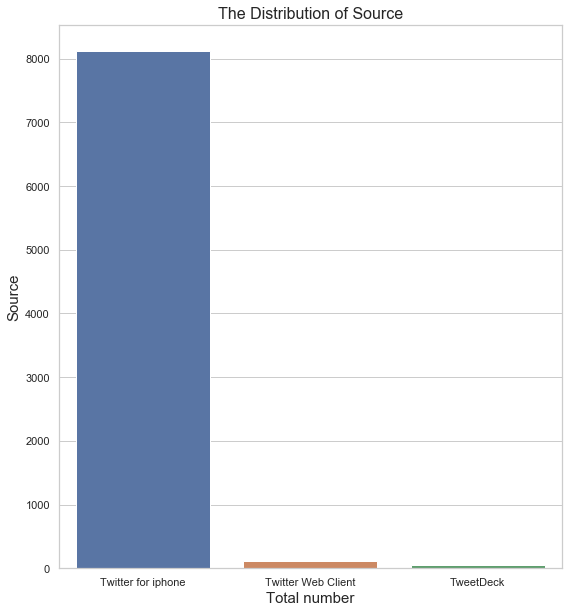

In [338]:
#histogram of the distribution of Source

print(twitter_archive_clean['source'].value_counts());
sns.set(style="whitegrid")
sns.countplot(data = twitter_archive_clean, x = 'source')
# title of graphs
plt.title('The Distribution of Source',fontsize=16);
# x-label of graphs
plt.xlabel('Total number', fontsize=15)
# y-label of graphs
plt.ylabel('Source', fontsize=15)





#### The plot above shows us the distribution of source. We can see that the commen source of tweets is from iPhone twitter app, which is 94% in the total. That means the twitter app is the most commen used for people using to tweet, retweet,favorite and post. while the TweetDesk is rare to use

## 2) which dog category have the highest favorites rate




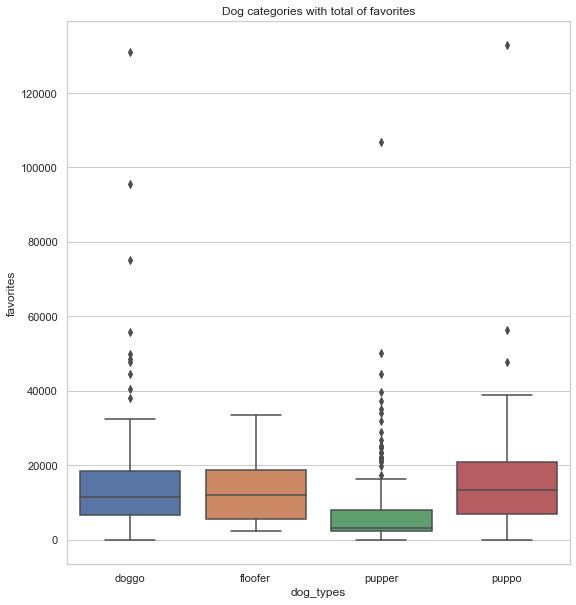

In [339]:
twitter_archive_clean.drop(twitter_archive_clean.query('(dog_types == "None")').index ,inplace=True)

sns.boxplot(x="dog_types", y="favorites", data=twitter_archive_clean).set_title('Dog categories with total of favorites');


#### As we can see, after removing None values from the dog_types and create the visiulaztion it is clear to us that puppo dog recorded the highest rate, then floofer,doggo, and pupper.

## 3) The corrlation between retweets and favorites


In [340]:
twitter_archive_clean.corr(method='pearson')


,rating_numerator,rating_denominator,favorites,retweets,img_num,p1_conf,p1_dog,p2_conf,p2_dog,p3_conf,p3_dog,year,month,day
rating_numerator,1.000000,NaN,0.346899,0.321134,0.180871,0.154346,0.242758,0.011156,0.213085,-0.075832,0.263590,0.426185,-0.090169,0.100219
rating_denominator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
favorites,0.346899,NaN,1.000000,0.837409,0.104383,0.022030,0.130031,0.016503,0.042200,-0.043490,0.063564,0.400780,-0.109625,0.070051
retweets,0.321134,NaN,0.837409,1.000000,0.095244,0.009818,0.088651,0.029959,0.001365,-0.035668,0.022766,0.285464,-0.104479,0.031424
img_num,0.180871,NaN,0.104383,0.095244,1.000000,0.208071,0.031385,-0.161122,0.091534,-0.133912,0.064945,0.159823,-0.043750,0.006072
p1_conf,0.154346,NaN,0.022030,0.009818,0.208071,1.000000,0.180009,-0.500945,0.164156,-0.710895,0.136266,0.040329,0.046854,0.003143
p1_dog,0.242758,NaN,0.130031,0.088651,0.031385,0.180009,1.000000,0.107414,0.625694,-0.032781,0.578573,0.159485,-0.042172,0.026082
p2_conf,0.011156,NaN,0.016503,0.029959,-0.161122,-0.500945,0.107414,1.000000,0.125332,0.461411,0.128866,0.069944,-0.030714,-0.005217
p2_dog,0.213085,NaN,0.042200,0.001365,0.091534,0.164156,0.625694,0.125332,1.000000,-0.048875,0.603987,0.117076,-0.002736,-0.022243
p3_conf,-0.075832,NaN,-0.043490,-0.035668,-0.133912,-0.710895,-0.032781,0.461411,-0.048875,1.000000,0.005893,-0.035854,-0.025357,0.037220


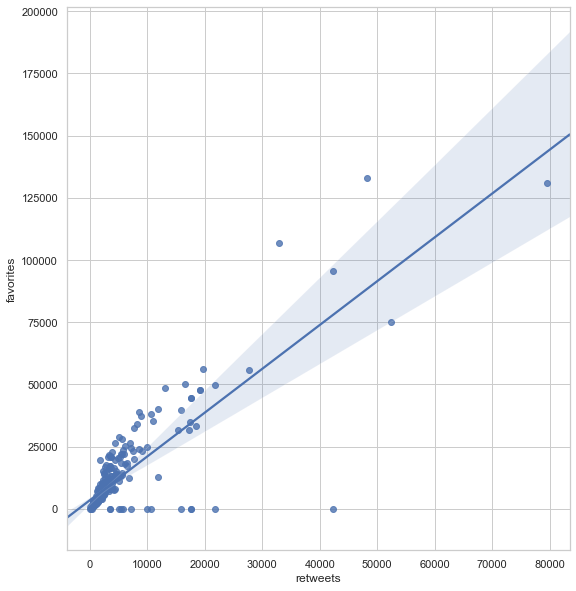

In [341]:
sns.regplot(x='retweets', y='favorites', data=twitter_archive_clean);

#### The most popular tweets usually get a large number of retweets and favorite. As we can see that i have test the corrlation between them and it was 0.837409, this is a high value showing a strong positive relationship between  retweets and favorite